In [3]:
import pandas as pd
import numpy as np

#가상 데이터 생성
np.random.seed(1)
data = {
    'A' : np.random.randint(1,6,10),
    'B' : np.random.randint(1,6,10),
    'C' : np.random.randint(1,6,10),
}

df = pd.DataFrame(data)

print(df)

   A  B  C
0  4  2  5
1  5  3  2
2  1  5  2
3  2  3  1
4  4  5  2
5  1  4  2
6  1  5  2
7  2  3  2
8  5  5  1
9  5  3  5


In [9]:
#일원 분산 분식 수행
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df['A'], df['B'],df['C'])
print("F-Statistic : ",p_val)

alpha = 0.05

if p_val < alpha :
    print("귀무 가설 기각")
else :
    print("귀무 가설 채택")

F-Statistic :  0.11992643045704418
귀무 가설 채택


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#load data
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class   
0           0       3    male  22.0      1      0   7.2500        S   Third  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

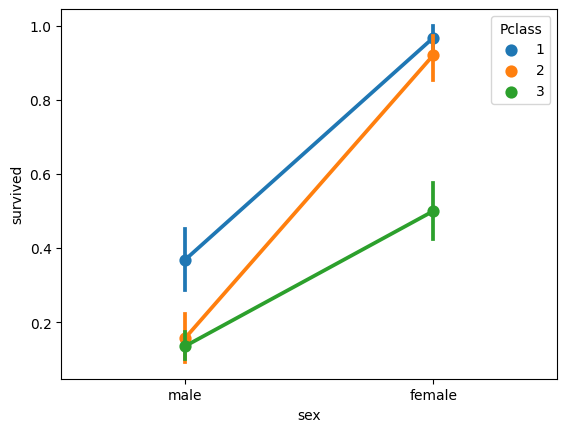

In [13]:
sns.pointplot(x="sex", y="survived", hue="pclass", data=titanic)
plt.legend(title="Pclass", loc="best") #loc는 plt.legend의 위치

In [20]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 26.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

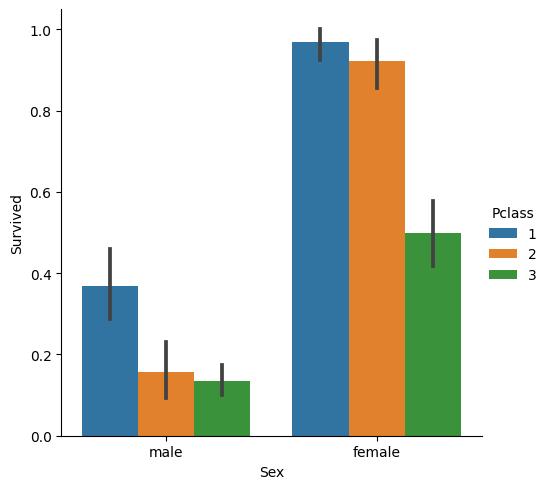

In [25]:
titanic_df = pd.read_csv("./data/Titanic_data.csv")

print(titanic_df)

#이원 분산 분석 모델 생성
#문자열 형태로 회귀식을 받아들여서 모델을 생성하는 함수 ols 
model = ols("Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)", titanic_df).fit()

#분석
anova_results = anova_lm(model, type=2)

#시각화
sns.catplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df, kind="bar")